<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>

* [0. OBJECTIVES and SCOPE](#0)
* [1. IMPORTING LIBRARIES](#1)
* [2. LOADING DATA](#2)    
* [3. EXPLORATORY DATA ANALYSIS](#3)  
* [4. FINAL CONCLUSIONS and RECOMMENDATIONS](#4)  
* [5. END](#5)

<a id="0"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">OBJECTIVES and SCOPE</p>

<span style="color:#0affef">Questions</span><br><br>
Before performing EDA, we should have a clear objective. So we can make the right questions and the right visualizations.<br>
* [Q1: What types of video titles and thumbnails drive the most traffic?](#101)
* [Q2: Who is the core audience and what are they interested in?](#102)
* [Q3: What are the top positive/negative words/sentences in comments?](#103)
* [Q4: What are the topics of the most liked comments? (clusters)](#104)
* [Q5: What are the topics suggested but not covered in videos](#105)

<br><br>
<span style="color:#0affef">Objectives</span><br>
<hr>
<span style="color:#0affef">1) Get new topics to write about.</span><br>
- Related questions: Q2,Q3,Q4,Q5<br>
<hr>
<span style="color:#0affef">2) Find suggestions in general.</span><br>
- Related questions: Q1,Q2,Q3,Q5.<br>
<hr>
<span style="color:#0affef">3) Find best titles and thumbnails.</span><br>
- Related questions: Q1<br>


<a id="1"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>
[Return to table of contents](#top)

In [1]:
# Environment variables
path_root = "/home/magody/programming/python/data_science/"
path_data = f"{path_root}projects/business/youtube/"
path_output = f"{path_root}output/"
project_name = "EmprendeAprendiendo"

In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

from textwrap import wrap
from io import BytesIO
from PIL import Image
import urllib.request

from emoji import UNICODE_EMOJI
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/magody/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<a id="2"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>
[Return to table of contents](#top)

## Description
The datasets are snapshots taken in 14-03-2022 15:00 GMT-5
1) {project_name}comments: Contains all TopLevel comments of channel (Around 120.000+).
2) {project_name}_aprendiendo_videos: Contains detail of All videos uploaded (200).

## Load

In [11]:
#Loading the dataset
def transform_int(s):
    
    try:
        return int(s)
    except:
        return 0

data1_comments: pd.DataFrame = pd.read_csv(f"{path_data}{project_name}_comments.csv")
data1_comments["like_count"] = data1_comments["like_count"].apply(te)
data2_videos: pd.DataFrame = pd.read_csv(f"{path_data}{project_name}_videos.csv")


## Eager explotarion

In [12]:
data1_comments.info()
data1_comments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121211 entries, 0 to 121210
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   author_name         121209 non-null  object
 1   content             121181 non-null  object
 2   author_channel_url  121160 non-null  object
 3   like_count          121211 non-null  int64 
 4   published_at        121160 non-null  object
 5   viewer_rating       121160 non-null  object
 6   video_id            121139 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.5+ MB


author_name                                            content  \
0  EmprendeAprendiendo  Disponible en Amazon el primer libro de Euge O...   
1          Gust Inomen                                                 Qe   
2         MaRioMendoza  Yo usaba unos razer black shark, pero me cambi...   
3             wurmtron  Parece casi una publicidad pagada por Razer. N...   
4               impers  es solo marca, nada en especial, los mejores e...   

                                  author_channel_url  like_count  \
0  http://www.youtube.com/channel/UCyM-2pRapEv6V2...          53   
1  http://www.youtube.com/channel/UCBdRyOuzWP9imP...           0   
2  http://www.youtube.com/channel/UCXz29Z7LqiQz8r...           0   
3  http://www.youtube.com/channel/UC6tzjZzVwG1_a0...           0   
4  http://www.youtube.com/channel/UCXE3p2IVJF4H2c...           0   

           published_at viewer_rating     video_id  
0  2020-07-12T15:30:50Z          none  3MqLxsaf9so  
1  2021-10-24T04:14:06Z          none  3MqLxsaf9so  
2  2021-10-23T05:17:14Z          none  3MqLxsaf9so  
3  2021-10-19T16:15:39Z          none  3MqLxsaf9so  
4  2021-10-15T04:14:06Z          none  3MqLxsaf9so

In [13]:
data2_videos.info()
data2_videos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   channel_id                        200 non-null    object
 1   video_id                          200 non-null    object
 2   published_at                      200 non-null    object
 3   title                             200 non-null    object
 4   description                       200 non-null    object
 5   url_thumbnail                     200 non-null    object
 6   tags                              200 non-null    object
 7   category_id                       200 non-null    int64 
 8   stats_view_count                  200 non-null    int64 
 9   stats_like_count                  200 non-null    int64 
 10  stats_favorite_count              200 non-null    int64 
 11  stats_comment_count               200 non-null    int64 
 12  content_details_durati

channel_id     video_id          published_at  \
0  UCyM-2pRapEv6V2q7UNO9icg  3MqLxsaf9so  2020-07-12T15:30:00Z   
1  UCyM-2pRapEv6V2q7UNO9icg  _BWmhWd6YmY  2017-05-24T15:28:31Z   
2  UCyM-2pRapEv6V2q7UNO9icg  tMtjvqMjsSA  2021-11-26T16:30:05Z   
3  UCyM-2pRapEv6V2q7UNO9icg  _ZE90hUDCTE  2018-03-18T17:54:40Z   
4  UCyM-2pRapEv6V2q7UNO9icg  l0okMAaZcJU  2021-03-08T20:00:07Z   

                                               title  \
0  🐍 Crearon un Imperio con la Cultura Gamer | Ca...   
1  👚 El hombre que inventó la MODA RÁPIDA | Caso ...   
2  ✈️ ¿Por qué viajar nos va a salir más caro que...   
3  📈 La Increíble Estrategia de Marketing de Payp...   
4                 ¿Qué son los NFTs y el Crypto Art?   

                                         description  \
0  Razer actualmente se ha posicionado como una d...   
1  PRUEBA GRATIS O RESERVA UNA PLAZA PARA SÍLEX 2...   
2  ACCEDE A LA OFERTA BLACK WEEK DE EMPRENDE APRE...   
3  ¿Conoces la historia de Paypal? En este caso a...   
4  En el vídeo de hoy trataremos qué son los NFTs...   

                                       url_thumbnail  \
0  https://i.ytimg.com/vi/3MqLxsaf9so/maxresdefau...   
1  https://i.ytimg.com/vi/_BWmhWd6YmY/maxresdefau...   
2  https://i.ytimg.com/vi/tMtjvqMjsSA/maxresdefau...   
3  https://i.ytimg.com/vi/_ZE90hUDCTE/maxresdefau...   
4  https://i.ytimg.com/vi/l0okMAaZcJU/maxresdefau...   

                                                tags  category_id  \
0  caso razer,counter strike,csgo,e sports,e-spor...           27   
1  amancio ortega,aprender a emprender,bershka,ca...           27   
2  emprende,emprende aprendiendo,emprendedores,em...           27   
3  caso paypal,casos exito,emprende,emprende apre...           27   
4  beeple,beeple nfts,como hacer nfts,crypto art,...           27   

   stats_view_count  stats_like_count  stats_favorite_count  \
0            157416              6927                     0   
1           1199298             29901                     0   
2            159183              6542                     0   
3            162163              6470                     0   
4            837782             35506                     0   

   stats_comment_count  content_details_duration_seconds  \
0                  433                              1097   
1                  842                               366   
2                  128                                46   
3                  220                               663   
4                 1591                               924   

   content_details_caption  content_details_licensedContent  
0                        0                                1  
1                        0                                1  
2                        0                                1  
3                        0                                1  
4                        0                                1

<a id="3"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS</p>
[Return to table of contents](#top)

## General

In [14]:
# Lets check keywords
def get_most_common_keywords(df, label="title", amount=20):

    return Counter(" ".join(df[label]).split()).most_common(amount)

In [33]:
data2_videos["score_like"] = data2_videos["stats_like_count"]/data2_videos["stats_view_count"]
data2_videos["score_comment"] = data2_videos["stats_comment_count"]/data2_videos["stats_view_count"]

## Questions

<a id="101"></a>
### Q1: What types of video titles and thumbnails drive the most traffic?

#### Analysis

In [16]:

q1_top = 20

q1_ctr_best = data2_videos.sort_values(["stats_view_count"], axis=0, ascending=[False]).head(q1_top)
q1_ctr_worst = data2_videos.sort_values(["stats_view_count"], axis=0, ascending=[True]).head(q1_top)



channel_id     video_id          published_at  \
86   UCyM-2pRapEv6V2q7UNO9icg  Iv7SgvuYEc4  2018-08-26T16:41:55Z   
136  UCyM-2pRapEv6V2q7UNO9icg  IRk3tg7xlFs  2017-07-04T15:57:39Z   

                                                 title  \
86   👎 ¿Por qué Crocs Cierra sus Fábricas? | Caso C...   
136  💿 El error empresarial más grande del siglo | ...   

                                           description  \
86   Recientemente la empresa de zapatillas Crocs h...   
136  PRUEBA GRATIS O RESERVA UNA PLAZA PARA SÍLEX 2...   

                                         url_thumbnail  \
86   https://i.ytimg.com/vi/Iv7SgvuYEc4/maxresdefau...   
136  https://i.ytimg.com/vi/IRk3tg7xlFs/maxresdefau...   

                                                  tags  category_id  \
86   costes fijos,crocs,crocs cierra fabrcias,crocs...           27   
136  blockbuster vs netflix,caso blockbuster,caso e...           27   

     stats_view_count  stats_like_count  stats_favorite_count  \
86            6514799             98690                     0   
136           5653954            102716                     0   

     stats_comment_count  content_details_duration_seconds  \
86                  6106                               505   
136                 4082                               709   

     content_details_caption  content_details_licensedContent  
86                         0                                1  
136                        0                                1

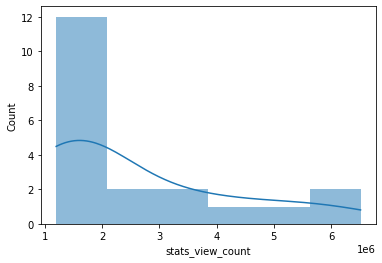

In [17]:
sns.histplot(q1_ctr_best['stats_view_count'], kde=True, linewidth=0)
q1_ctr_best.head(2)

channel_id     video_id          published_at  \
160  UCyM-2pRapEv6V2q7UNO9icg  LZJGtDwh13c  2019-05-26T15:30:01Z   
92   UCyM-2pRapEv6V2q7UNO9icg  mLCgkN36T_o  2020-02-23T16:30:01Z   

                                                 title  \
160  🤔 ¿Por qué peligra HBO sin Juego de Tronos? | ...   
92   CASO PINTEREST: La Red Social que Amenaza a Fa...   

                                           description  \
160  Todos nos estamos recuperando aún del final de...   
92   En el vídeo de hoy tratamos la red social Pint...   

                                         url_thumbnail  \
160  https://i.ytimg.com/vi/LZJGtDwh13c/maxresdefau...   
92   https://i.ytimg.com/vi/mLCgkN36T_o/maxresdefau...   

                                                  tags  category_id  \
160  HBO,Netflix,amazon,cine,competidores,disney,em...           27   
92   casopinterest,comofuncionapinterest,emprende,e...           27   

     stats_view_count  stats_like_count  stats_favorite_count  \
160            151266              5943                     0   
92             153180              8211                     0   

     stats_comment_count  content_details_duration_seconds  \
160                  469                               604   
92                   414                               646   

     content_details_caption  content_details_licensedContent  
160                        0                                1  
92                         0                                1

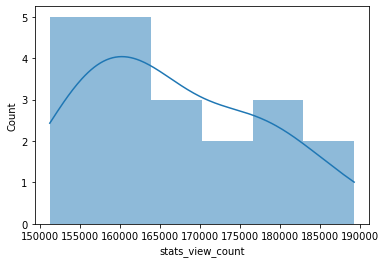

In [18]:
sns.histplot(q1_ctr_worst['stats_view_count'], kde=True, linewidth=0)
q1_ctr_worst.head(2)

In [54]:
def parse_q1(df):
    q1_video_id = df["video_id"].values
    q1_titles = df["title"].values
    q1_thumbnails = df["url_thumbnail"].values
    
    assert len(q1_video_id) == len(q1_thumbnails) and len(q1_video_id) == len(q1_titles)
    
    return q1_video_id, q1_titles, q1_thumbnails

def request_url_image(url):
    # Adding information about user agent to don't get blocked
    opener=urllib.request.build_opener()
    opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
    urllib.request.install_opener(opener)    
    # calling urlretrieve function to get resource
    img = Image.open(BytesIO(urllib.request.urlopen(url).read()))

    return img

import warnings

def plot_imgs_grid(rows,cols,titles,images,figsize=(36,28)):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        f, axarr = plt.subplots(rows,cols, figsize=figsize) # (width,height)

        counter = 0
        for i in range(rows):
            for j in range(cols):
                title = titles[counter].replace("$", "d")  # matplotlib exception with $
                try:
                    title = "\n".join(wrap(title, width=30))
                except:
                    pass
                axarr[i,j].imshow(images[counter])
                axarr[i,j].set_title(title,fontsize=20)
                counter += 1
        plt.show()
    # TODO: Take this outside

In [49]:
# retrieve images
q1_video_id_b, q1_titles_b, q1_thumbnails_b = parse_q1(q1_ctr_best)
q1_thumbnails_as_img_b = []
for i in tqdm(range(len(q1_thumbnails_b))):
    q1_thumbnails_as_img_b.append(request_url_image(q1_thumbnails_b[i]))

In [50]:
q1_video_id_w, q1_titles_w, q1_thumbnails_w = parse_q1(q1_ctr_worst)
q1_thumbnails_as_img_w = []
for i in tqdm(range(len(q1_thumbnails_w))):
    q1_thumbnails_as_img_w.append(request_url_image(q1_thumbnails_w[i]))
# worst to better
q1_video_id_w = q1_video_id_w[::-1]
q1_titles_w = q1_titles_w[::-1]
q1_thumbnails_as_img_w = q1_thumbnails_as_img_w[::-1]

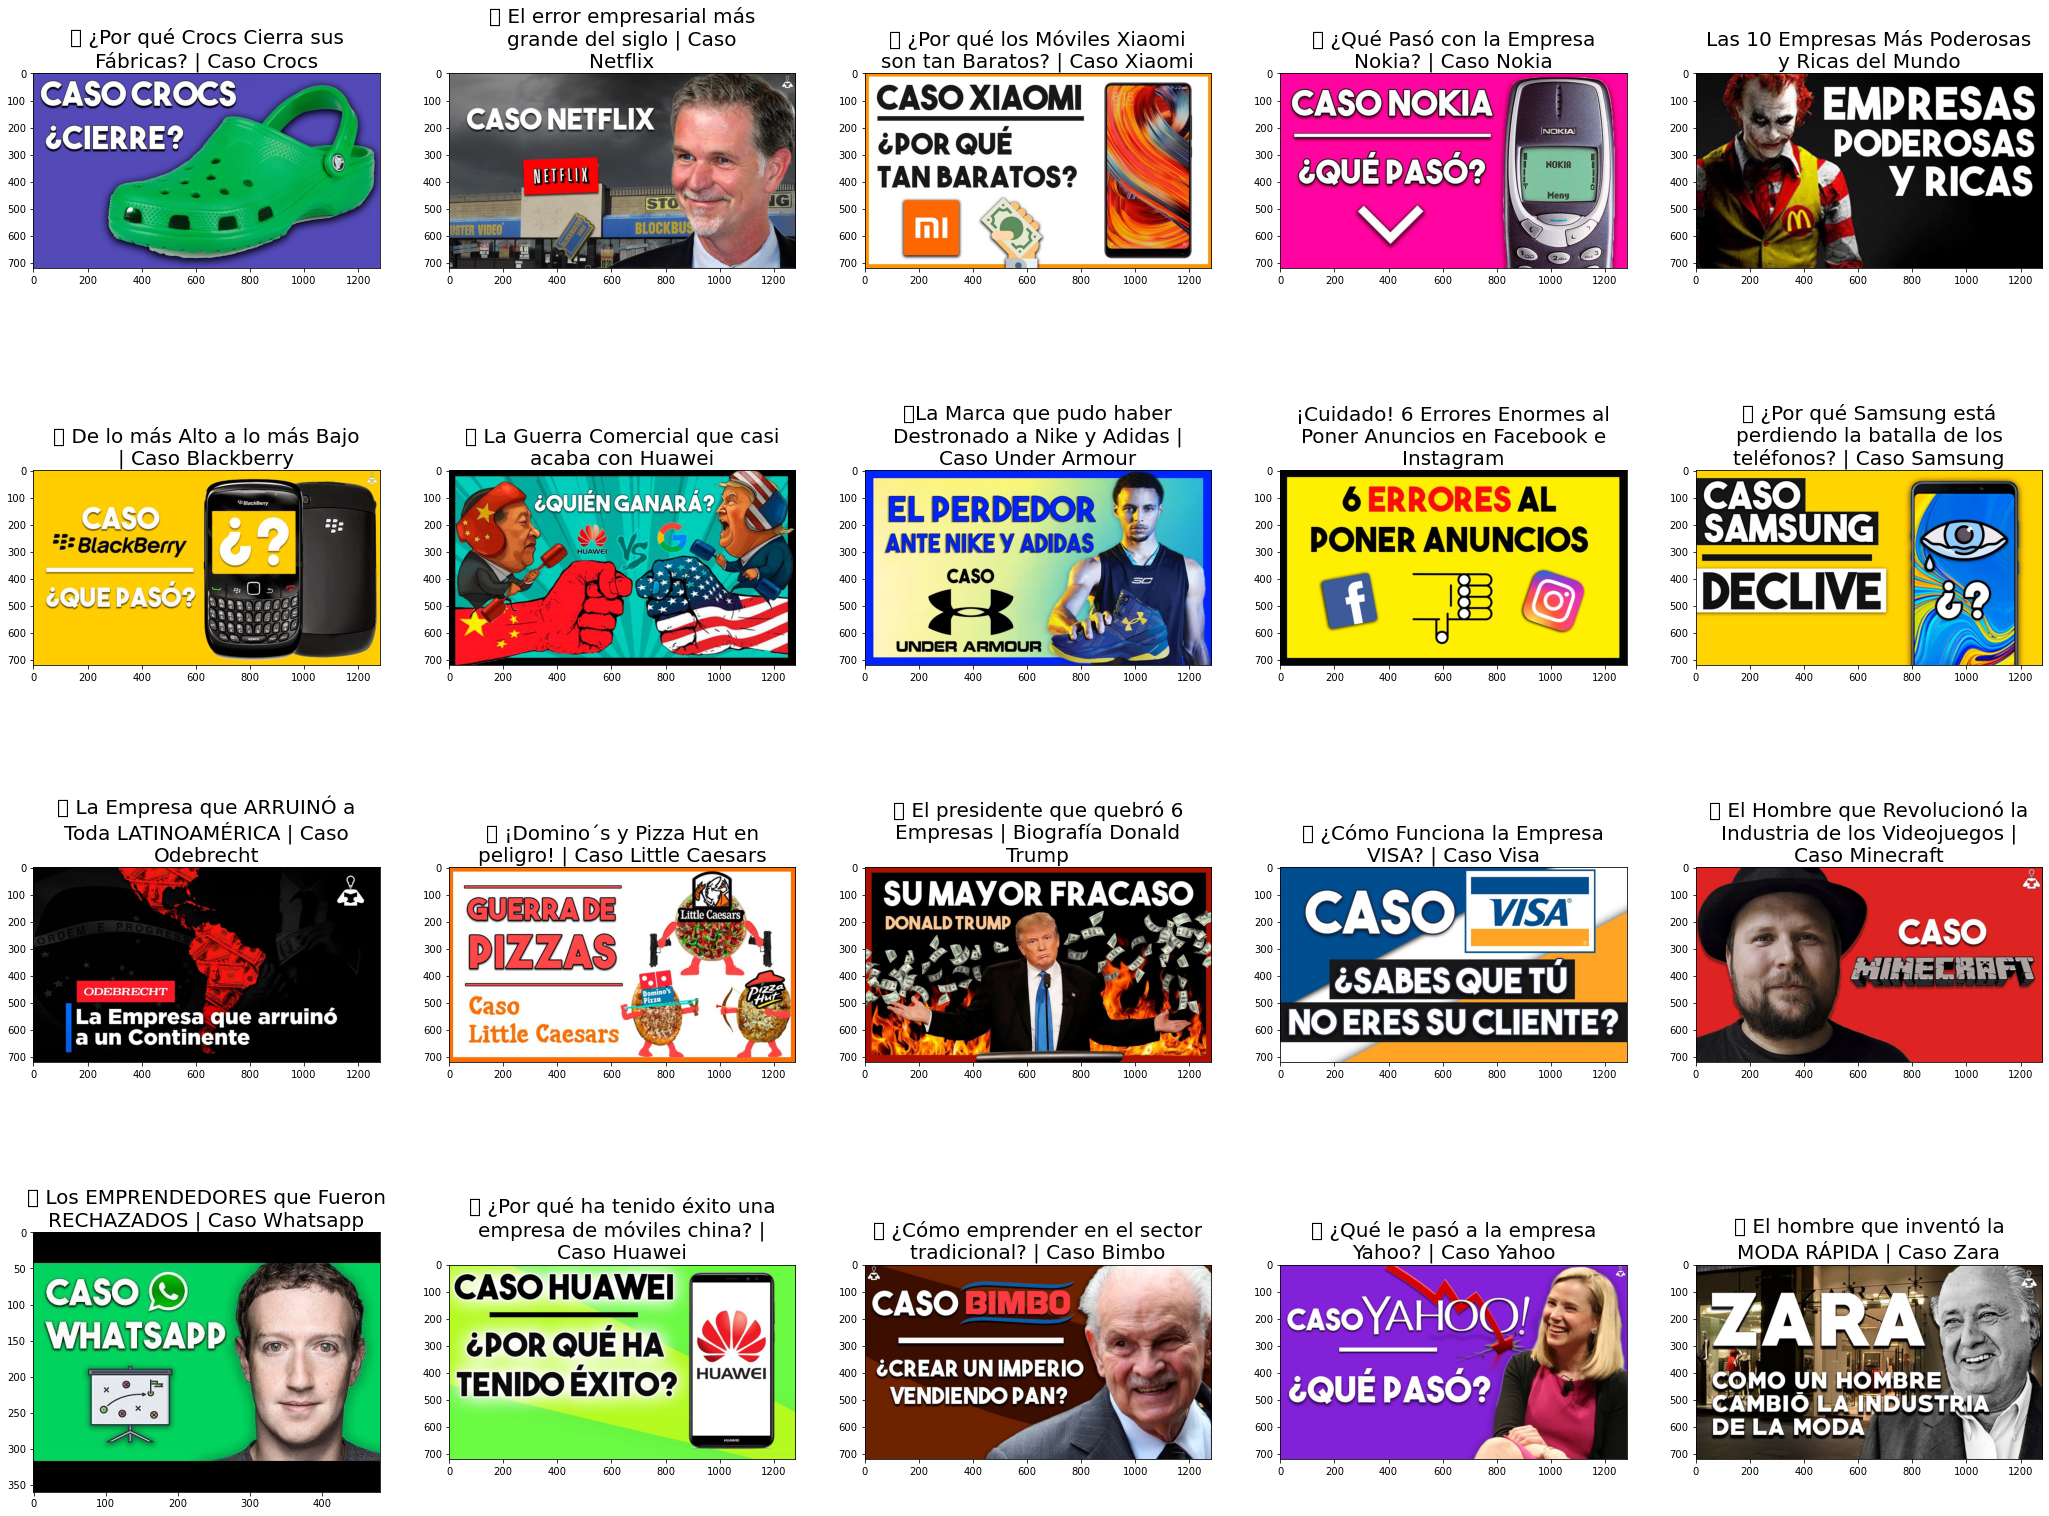

In [55]:
# best title-thumnail combination
plot_imgs_grid(4,5,q1_titles_b,q1_thumbnails_as_img_b)

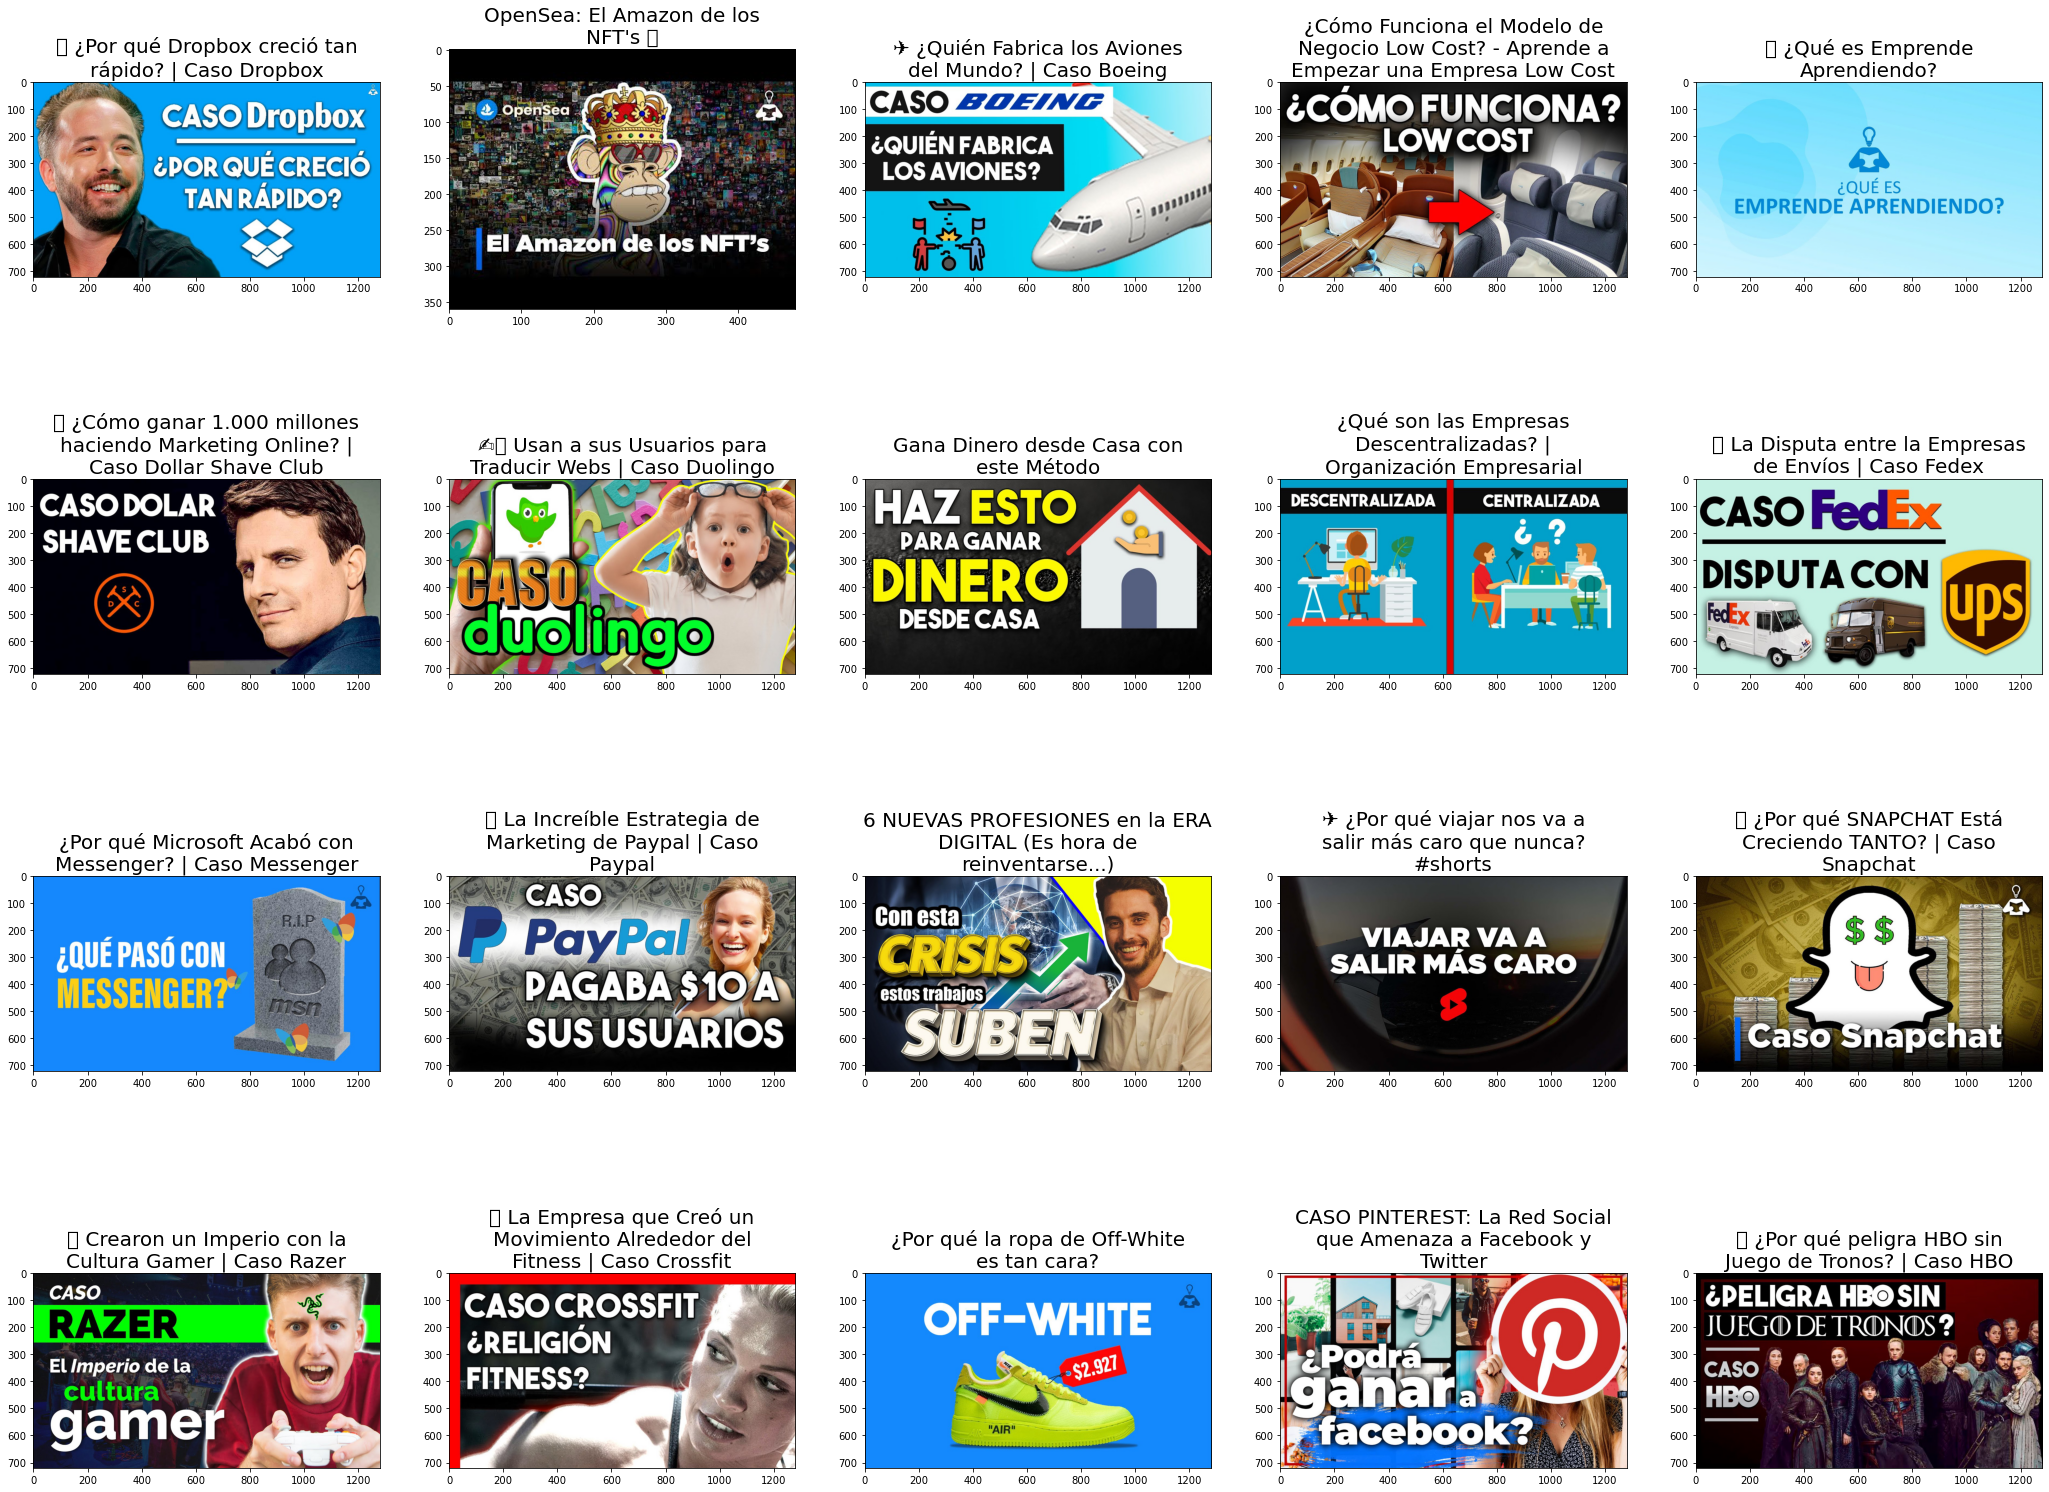

In [56]:
# worst(?) title-thumbnail combination
plot_imgs_grid(4,5,q1_titles_w,q1_thumbnails_as_img_w)

In [20]:
get_most_common_keywords(q1_ctr_best,"title",10)
        

[('|', 17),
 ('Caso', 16),
 ('que', 7),
 ('la', 6),
 ('¿Por', 4),
 ('qué', 4),
 ('El', 4),
 ('a', 4),
 ('más', 3),
 ('los', 3)]

In [21]:
get_most_common_keywords(q1_ctr_worst,"title",10)

[('|', 12),
 ('Caso', 11),
 ('de', 8),
 ('¿Por', 6),
 ('qué', 6),
 ('La', 4),
 ('a', 4),
 ('la', 4),
 ('que', 3),
 ('con', 3)]

No pattern found, we need advanced algorithms in modeling

#### Conclusion

See [4. FINAL CONCLUSIONS and RECOMMENDATIONS](#4)

<a id="102"></a>
### Q2: Who is the core audience and what are they interested in?

#### Analysis

In [43]:
q2 = data2_videos["description"].values
print(len(q2))
vectorizer = TfidfVectorizer(stop_words={'spanish'}) # TF-IDF > Counting method
X_q2 = vectorizer.fit_transform(q2)

200


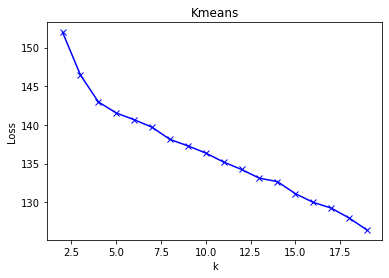

In [44]:
score = []
K = range(2,20)
for k in K:
   model = KMeans(n_clusters=k, max_iter=200, n_init=10)
   model = model.fit(X_q2)
   score.append(model.inertia_)
plt.plot(K, score, 'bx-')
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Kmeans')
plt.show()

KMeans can't determine the topics. So lets pick any number. Gaussian mixture can do it better?

<AxesSubplot:xlabel='clusters', ylabel='Count'>

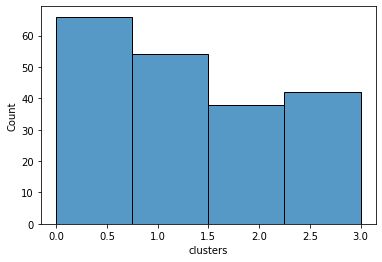

In [45]:
#Initiating the Agglomerative Clustering model
n_clusters = 4
AC = AgglomerativeClustering(n_clusters=n_clusters)
# fit model and predict clusters
yhat_AC = AC.fit_predict(X_q2.toarray())
data2_videos["clusters"] = yhat_AC
sns.histplot(data2_videos["clusters"],bins=n_clusters)

<AxesSubplot:xlabel='clusters', ylabel='Count'>

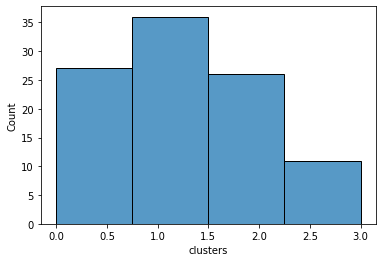

In [46]:
q2_top100 = data2_videos.sort_values(['score_like', "score_comment"],ascending=False,axis=0).head(100)
sns.histplot(q2_top100["clusters"],bins=n_clusters)

In [47]:
# Top 10 most liked rate
q2_top100.head(10)

channel_id     video_id          published_at  \
51   UCyM-2pRapEv6V2q7UNO9icg  TSc5xaRAkq8  2021-09-12T17:00:28Z   
155  UCyM-2pRapEv6V2q7UNO9icg  eXBK6RLv39E  2020-03-25T16:30:02Z   
149  UCyM-2pRapEv6V2q7UNO9icg  5l0NZxSBM2A  2020-03-22T16:30:01Z   
17   UCyM-2pRapEv6V2q7UNO9icg  QeumfFeixFY  2020-03-06T16:30:02Z   
11   UCyM-2pRapEv6V2q7UNO9icg  NyZ4RIrM7fI  2021-08-29T17:00:17Z   
145  UCyM-2pRapEv6V2q7UNO9icg  jmGrroicfdM  2019-03-03T16:30:01Z   
92   UCyM-2pRapEv6V2q7UNO9icg  mLCgkN36T_o  2020-02-23T16:30:01Z   
98   UCyM-2pRapEv6V2q7UNO9icg  3QwJ4q5BY98  2020-05-10T15:30:00Z   
197  UCyM-2pRapEv6V2q7UNO9icg  SZQS0dY10UE  2021-04-25T17:00:07Z   
19   UCyM-2pRapEv6V2q7UNO9icg  sBUEgdHjcNE  2020-05-01T15:30:06Z   

                                                 title  \
51                    El Éxito de Discord Explicado ✔️   
155  De VAGO a MEGA PRODUCTIVO | Cómo no Procrastin...   
149  ✍🏻 Usan a sus Usuarios para Traducir Webs | Ca...   
17   REACCIONO A PACO VENDEDOR DE EMPANADAS | Estra...   
11   🟡 ¿Por qué SNAPCHAT Está Creciendo TANTO? | Ca...   
145  🕹️ ¿Por qué League Of Legends se hizo tan famo...   
92   CASO PINTEREST: La Red Social que Amenaza a Fa...   
98   ¿Puede una Empresa de Videollamadas MORIR de É...   
197  🕹️ ¿Por qué Mixer Perdió la Batalla del Stream...   
19   8 + 1 Trabajos Freelance que puedes hacer desd...   

                                           description  \
51   Discord es una plataforma de comunicación que ...   
155  En el vídeo de hoy, Euge Oller trata 12 concep...   
149  Duolingo, es la plataforma de idiomas más famo...   
17   En el vídeo de hoy Euge Oller reacciona a Paco...   
11   ¿Sabías que Snapchat es la red social que más ...   
145  ¿Alguna vez te has preguntado por qué unos vid...   
92   En el vídeo de hoy tratamos la red social Pint...   
98   Todos hemos oído hablar de Zoom, la aplicación...   
197  Mixer era la plataforma de Microsoft que querí...   
19   Aprovechando que hoy es el día del trabajador,...   

                                         url_thumbnail  \
51   https://i.ytimg.com/vi/TSc5xaRAkq8/maxresdefau...   
155  https://i.ytimg.com/vi/eXBK6RLv39E/maxresdefau...   
149  https://i.ytimg.com/vi/5l0NZxSBM2A/maxresdefau...   
17   https://i.ytimg.com/vi/QeumfFeixFY/maxresdefau...   
11   https://i.ytimg.com/vi/NyZ4RIrM7fI/maxresdefau...   
145  https://i.ytimg.com/vi/jmGrroicfdM/maxresdefau...   
92   https://i.ytimg.com/vi/mLCgkN36T_o/maxresdefau...   
98   https://i.ytimg.com/vi/3QwJ4q5BY98/maxresdefau...   
197  https://i.ytimg.com/vi/SZQS0dY10UE/maxresdefau...   
19   https://i.ytimg.com/vi/sBUEgdHjcNE/maxresdefau...   

                                                  tags  category_id  \
51   caso discord,como funciona discord,discord,emp...           27   
155  aburrido,como se más productivo,covid-19,empre...           27   
149  aprender idiomas,aprender ingles gratis,como a...           27   
17   emprende,emprende aprendiendo,emprendedores,em...           27   
11   crecimiento de snapchat,el crecimiento de snap...           27   
145  Emprendeaprendiendo,best esports player,best s...           27   
92   casopinterest,comofuncionapinterest,emprende,e...           27   
98   caso zoom,como gana dinero zoom,como hace dine...           27   
197  caso mixer,contrato de ninja con mixer,emprend...           27   
19   como conseguir trabajo en crisis,como sobreviv...           27   

     stats_view_count  stats_like_count  stats_favorite_count  \
51             309233             22656                     0   
155            374003             25698                     0   
149            172951             10238                     0   
17             370192             21829                     0   
11             158974              9316                     0   
145            418835             22789                     0   
92             153180              8211                     0   
98             256684             13731            

In [48]:
# Top 10 from clusters
best_clusters = [1,7,0]
cols_relevant = ["title", "tags", "content_details_duration_seconds", "score_like"]

for bc in best_clusters:
    q2_bc = q2_top100[q2_top100["clusters"] == bc]
    print(f"\nCLUSTER {bc}")
    keywords_title = Counter(" ".join(q2_bc["title"]).split()).most_common(10)
    keywords_tags = Counter(" ".join(q2_bc["tags"].apply(lambda s: s.replace(","," "))).split()).most_common(10)
    print("TOP TITLE", keywords_title)
    print("TOP TAG", keywords_tags)
    print(q2_bc["title"].values)


CLUSTER 1
TOP TITLE [('|', 24), ('de', 19), ('Caso', 19), ('la', 10), ('en', 8), ('qué', 8), ('a', 7), ('¿Por', 7), ('no', 4), ('que', 4)]
TOP TAG [('emprende', 72), ('de', 49), ('empresa', 48), ('emprendedores', 37), ('aprendiendo', 36), ('como', 32), ('historia', 15), ('es', 14), ('forever', 14), ('21', 14)]
['De VAGO a MEGA PRODUCTIVO | Cómo no Procrastinar en tiempos de Cuarentena'
 '✍🏻 Usan a sus Usuarios para Traducir Webs | Caso Duolingo'
 'REACCIONO A PACO VENDEDOR DE EMPANADAS | Estrategias de Venta Avanzadas'
 'CASO PINTEREST: La Red Social que Amenaza a Facebook y Twitter'
 '¿Puede una Empresa de Videollamadas MORIR de Éxito? | Caso Zoom'
 '8 + 1 Trabajos Freelance que puedes hacer desde Casa este 2020'
 '👨\u200d🍳 Empieza un Negocio de Venta de Comida desde Casa Altamente Rentable | Crea tu Dark Kitchen'
 '5 Pasos para Pasar de Idea de Negocio a Empresa Exitosa'
 'CAMBIO de Modelo de Negocio en Apple: ¿Qué está pasando? 🧐'
 '6 NUEVAS PROFESIONES en la ERA DIGITAL (Es hora d

#### Conclusion

Cluster 1: Very well known enterprises, Social network and uber like.
Cluster 0: videogames related mostly

<a id="103"></a>
### Q3: What are the top positive/negative words/sentences in comments?

We can train a classifier but meh, is easy and already someone did it probably much better...

#### Analysis

In [60]:
import requests
import json


def translate(text, from_lang, to_lang):
    api_url = "http://mymemory.translated.net/api/get?q={}&langpair={}|{}".format(text, from_lang, to_lang)
    hdrs ={'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
            'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
            'Accept-Encoding': 'none',
            'Accept-Language': 'en-US,en;q=0.8',
            'Connection': 'keep-alive'}
    response = requests.get(api_url, headers=hdrs)
    response_json = json.loads(response.text)
    return response_json["responseData"]["translatedText"]


translate("hola mi amor", "es", "en")
# TODO: get spanish api

'Hello my love.'

In [72]:
data1_comments.head()

author_name                                            content  \
0  EmprendeAprendiendo  Disponible en Amazon el primer libro de Euge O...   
1          Gust Inomen                                                 Qe   
2         MaRioMendoza  Yo usaba unos razer black shark, pero me cambi...   
3             wurmtron  Parece casi una publicidad pagada por Razer. N...   
4               impers  es solo marca, nada en especial, los mejores e...   

                                  author_channel_url  like_count  \
0  http://www.youtube.com/channel/UCyM-2pRapEv6V2...          53   
1  http://www.youtube.com/channel/UCBdRyOuzWP9imP...           0   
2  http://www.youtube.com/channel/UCXz29Z7LqiQz8r...           0   
3  http://www.youtube.com/channel/UC6tzjZzVwG1_a0...           0   
4  http://www.youtube.com/channel/UCXE3p2IVJF4H2c...           0   

           published_at viewer_rating     video_id  
0  2020-07-12T15:30:50Z          none  3MqLxsaf9so  
1  2021-10-24T04:14:06Z          none  3MqLxsaf9so  
2  2021-10-23T05:17:14Z          none  3MqLxsaf9so  
3  2021-10-19T16:15:39Z          none  3MqLxsaf9so  
4  2021-10-15T04:14:06Z          none  3MqLxsaf9so

In [83]:

# TODO: comments with low length of text also are important, dont discard

mask = (data1_comments["content"].apply(lambda s: len(str(s)) > 50)) & (data1_comments["like_count"] > 100)

comments_relevant = data1_comments[mask].sort_values(["like_count"], ascending=False).loc[:, ["content", "like_count"]]

comments_relevant.head()

content  like_count
117494  De los creadores de &quot;Apel&quot;, &quot;Gu...        6672
117778  Cuando dijo &quot;Chayomi&quot; ya sabía de qu...        6018
26593   Mm...quizas las niñas ya no quieran jugar con ...        4934
70963   Tuvieron su éxito al descubrir como fabricar u...        4258
115290  Ya que hablaste de Chayomi.. ¿Puedes hablar  d...        3892

In [86]:
import time

def translate_content(text, wait=0.2):
    time.sleep(wait)
    return translate(text, "es", "en")

def label_sentiment(text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    if neg > pos:
        return -neg
    elif pos > neg:
        return pos
    return 0

# expected time 1min processing
comments_relevant["content_en"] = comments_relevant["content"].apply(translate_content)
comments_relevant["sentiment"] = comments_relevant["content_en"].apply(label_sentiment)


In [87]:
is_negative = (comments_relevant["sentiment"] < 0)
comments_positive = comments_relevant[~is_negative]
comments_negative = comments_relevant[is_negative]
print(f"Positive: {len(comments_positive)}, Negative: {len(comments_negative)}")

Positive: 1202, Negative: 12


In [89]:
# should we remove stop words? todo#
get_most_common_keywords(comments_positive,"content",100)[-60:-50]

[('años', 73),
 ('El', 69),
 ('<a', 67),
 ('ser', 66),
 ('está', 63),
 ('mas', 63),
 ('empresa', 62),
 ('esta', 61),
 ('tu', 61),
 ('desde', 61)]

In [91]:
# should we remove stop words? todo#
get_most_common_keywords(comments_negative,"content",100)[-60:-50]

[('&quot;I-PE-EFE&quot;.', 1),
 ('&quot;Tener', 1),
 ('tener', 1),
 ('derrocharlo&quot;.', 1),
 ('Cierto,', 1),
 ('cual', 1),
 ('haga', 1),
 ('su', 1),
 ('le', 1),
 ('plazca.', 1)]

In [92]:
comments_positive.sort_values(["sentiment"],ascending=False,axis=0).head(20)

content  like_count  \
97677   HBO estaba dispuesto a financiar 10 temporadas...         229   
104858  Hay vencer esa mentalidad cortoplacista y enfo...         175   
75819   2019: subtitulos. <br><br>2020: papel higienic...         174   
113605  de los creadores de &quot;Apel&quot; y &quot;g...         174   
23581   Viajero del tiempo: que haces?<br>Yo: busco no...         174   
104080  Fb se centro más en vender los datos de los us...         174   
45734   Lecciones de Emprende aprendiendo:<br><br>1. V...         175   
73790   Les recomiendo a todos los que quieran conocer...         175   
79094   Gracias por los conociemientos regalados, me e...         175   
85928   No estudio economía o administración pero esto...         173   
106414  En México la little César anda en menos de 4 d...         176   
34211   Lo mejor de discord fue que terminó siendo el ...         177   
119597  SubWay: abre millones de locales<br>Starbucks:...         177   
4172    Under Armour: camisas para deporte<br>Nike/adi...         177   
77619   Me encantaría ver el caso tik tok, la verdad n...         178   
17290   Gibson, el Apple de las guitarras ... Pero con...         178   
77329   Deberían hacer una película sobre estos dos se...         173   
102024  1. Importancia del vídeo<br>2. Presencia en re...         173   
2878    Es muy interesante ver cómo las dos empresas v...         178   
832     Si la demanda cae, los precios también. No hay...         170   

                                               content_en  sentiment  
97677   MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
104858  MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
75819   MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
113605  MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
23581   MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
104080  MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
45734   MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
73790   MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
79094   MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
85928   MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
106414  MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
34211   MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
119597  MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
4172    MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
77619   MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
17290   MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
77329   MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
102024  MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
2878    MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138  
832     MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...      0.138

In [93]:
comments_negative = comments_negative.sort_values(["sentiment"],ascending=True,axis=0)

comments_negative.head(20)

content  like_count  \
44988   &quot;YPF&quot; significa &quot;Yacimientos Pe...         958   
99429   &quot;Tener dinero no significa tener que derr...         646   
28771   &quot;TikTok es la red social en la que los us...         318   
49244   &quot;Tuenti wan&quot; ? Deja lo busco en &quo...         272   
90290   &quot;Los pillan a todos&quot; y como estas ta...         253   
3326    &quot;En los momentos duros y difíciles, es cu...         217   
100130  &quot;Nestle quiere crear comida que alimente ...         158   
48940   &quot;Precios baratos&quot;<br>Y aquí en Colom...         150   
79626   &quot;Nuevo modelo de negocio&quot;. Esto lo h...         149   
119447  &quot;Podría Subway acabar en la quiebra?&quot...         145   
59366   &quot;Lo que en un principio parece imposible,...         144   
22318   &quot;No estamos creando servicios para ganar ...         130   

                                               content_en  sentiment  
44988   NO QUERY SPECIFIED. EXAMPLE REQUEST: GET?Q=HEL...     -0.306  
99429   NO QUERY SPECIFIED. EXAMPLE REQUEST: GET?Q=HEL...     -0.306  
28771   NO QUERY SPECIFIED. EXAMPLE REQUEST: GET?Q=HEL...     -0.306  
49244   NO QUERY SPECIFIED. EXAMPLE REQUEST: GET?Q=HEL...     -0.306  
90290   NO QUERY SPECIFIED. EXAMPLE REQUEST: GET?Q=HEL...     -0.306  
3326    NO QUERY SPECIFIED. EXAMPLE REQUEST: GET?Q=HEL...     -0.306  
100130  NO QUERY SPECIFIED. EXAMPLE REQUEST: GET?Q=HEL...     -0.306  
48940   NO QUERY SPECIFIED. EXAMPLE REQUEST: GET?Q=HEL...     -0.306  
79626   NO QUERY SPECIFIED. EXAMPLE REQUEST: GET?Q=HEL...     -0.306  
119447  NO QUERY SPECIFIED. EXAMPLE REQUEST: GET?Q=HEL...     -0.306  
59366   NO QUERY SPECIFIED. EXAMPLE REQUEST: GET?Q=HEL...     -0.306  
22318   NO QUERY SPECIFIED. EXAMPLE REQUEST: GET?Q=HEL...     -0.306

In [102]:
with open("temp.txt","w") as f:
    f.writelines(map(lambda s: s+"\n\n",comments_positive["content"].values))

#### Conclusion

<a id="104"></a>
### Q4: What are the topics of the most liked comments?

#### Analysis

In [95]:
q4_top1000 = data1_comments.sort_values(["like_count"],ascending=False,axis=0).head(1000)
q4 = q4_top1000["content"].values
print(len(q4))
vectorizer = TfidfVectorizer(stop_words={'spanish'})
X = vectorizer.fit_transform(q4)
q4_top1000.head()

1000


author_name                                            content  \
117494   Levi Enríquez  De los creadores de &quot;Apel&quot;, &quot;Gu...   
117778   Julio Pacheco  Cuando dijo &quot;Chayomi&quot; ya sabía de qu...   
114442      D5 CHANNEL  Bien por chayomi, a este paso va superar xiaom...   
26593         Yeli uwu  Mm...quizas las niñas ya no quieran jugar con ...   
114499  Tomás Palacios                 Chayomi, los telefonos de chayanne   

                                       author_channel_url  like_count  \
117494  http://www.youtube.com/channel/UC6A3Y6cTq4EIQz...        6672   
117778  http://www.youtube.com/channel/UC7M8y2D9rLQz7Z...        6018   
114442  http://www.youtube.com/channel/UC_l8iUDV5GcGwQ...        5219   
26593   http://www.youtube.com/channel/UCxnOZ1uwmQCh59...        4934   
114499  http://www.youtube.com/channel/UCAcFmbERN6uJVB...        4308   

                published_at viewer_rating     video_id  
117494  2018-10-30T01:42:02Z          none  Nfftr3_Cd1A  
117778  2018-10-28T19:45:31Z          none  Nfftr3_Cd1A  
114442  2019-11-30T20:01:18Z          none  Nfftr3_Cd1A  
26593   2018-10-21T19:06:25Z          none  Cm1bmV0eRCg  
114499  2019-11-25T13:50:52Z          none  Nfftr3_Cd1A

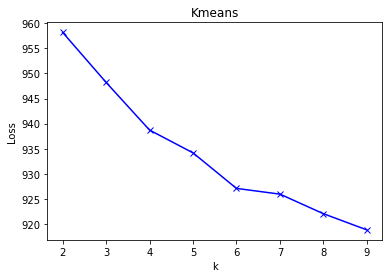

In [96]:

score = []
K = range(2,10)
for k in K:
   model = KMeans(n_clusters=k, max_iter=200, n_init=10)
   model = model.fit(X)
   score.append(model.inertia_)
plt.plot(K, score, 'bx-')
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Kmeans')
plt.show()

K means is not able to determine the topics (high loss and not convergence). So choose any number.

<AxesSubplot:xlabel='clusters', ylabel='Count'>

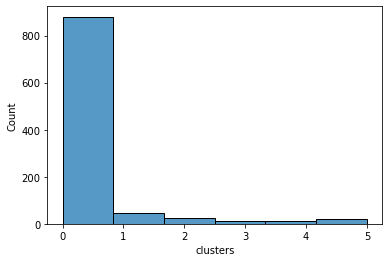

In [97]:
#Initiating the Agglomerative Clustering model 
n_clusters = 6
AC = AgglomerativeClustering(n_clusters=n_clusters)
# fit model and predict clusters
yhat_AC = AC.fit_predict(X.toarray())
q4_top1000["clusters"] = yhat_AC
sns.histplot(q4_top1000["clusters"],bins=n_clusters)

In [98]:
q4_top1000[q4_top1000["clusters"] == 0].head(10)

author_name                                            content  \
114442       D5 CHANNEL  Bien por chayomi, a este paso va superar xiaom...   
26593          Yeli uwu  Mm...quizas las niñas ya no quieran jugar con ...   
114499   Tomás Palacios                 Chayomi, los telefonos de chayanne   
70963       Chico Julio  Tuvieron su éxito al descubrir como fabricar u...   
115290        Circo Try  Ya que hablaste de Chayomi.. ¿Puedes hablar  d...   
71005          Son Goku  BLOQUEO!!! BLOQUEO!! BLOQUEO!! BLOQUEO!!! buen...   
119091     Sebas Romero  A mixer le fue muy mal, tanto que si no es por...   
38519   Acuario en casa  recuerdo que cuando al fin pude comprarme un b...   
58907           ELKRAZY               Pues justo llevo unos crocs ahora xD   
21311     Alberto Ochoa  Aquellos que no juegan Minecraft porque piensa...   

                                       author_channel_url  like_count  \
114442  http://www.youtube.com/channel/UC_l8iUDV5GcGwQ...        5219   
26593   http://www.youtube.com/channel/UCxnOZ1uwmQCh59...        4934   
114499  http://www.youtube.com/channel/UCAcFmbERN6uJVB...        4308   
70963   http://www.youtube.com/channel/UCuo6kmOd7LU5Z8...        4258   
115290  http://www.youtube.com/channel/UCtFZqrqZ1EfRI3...        3892   
71005   http://www.youtube.com/channel/UCtEc9FEcVdQvKq...        3492   
119091  http://www.youtube.com/channel/UCzwS-1yFUJMTu8...        3463   
38519   http://www.youtube.com/channel/UCitWDkRC5WjYgA...        3200   
58907   http://www.youtube.com/channel/UCloVw4V4hhDOyo...        2934   
21311   http://www.youtube.com/channel/UCdAoVzhwxTTy7O...        2756   

                published_at viewer_rating     video_id  clusters  
114442  2019-11-30T20:01:18Z          none  Nfftr3_Cd1A         0  
26593   2018-10-21T19:06:25Z          none  Cm1bmV0eRCg         0  
114499  2019-11-25T13:50:52Z          none  Nfftr3_Cd1A         0  
70963   2019-05-19T16:03:50Z          none  l82j3cAAUjg         0  
115290  2019-05-15T05:35:36Z          none  Nfftr3_Cd1A         0  
71005   2019-05-19T15:33:54Z          none  l82j3cAAUjg         0  
119091  2021-04-25T19:39:18Z          none  SZQS0dY10UE         0  
38519   2017-09-11T07:32:22Z          none  SrHl06MLXsY         0  
58907   2018-08-26T18:29:44Z          none  Iv7SgvuYEc4         0  
21311   2017-07-30T14:31:11Z          none  qihljRg8tIc         0

In [99]:
q4_top1000[q4_top1000["clusters"] == 1].head(10)

author_name                                            content  \
117494    Levi Enríquez  De los creadores de &quot;Apel&quot;, &quot;Gu...   
117778    Julio Pacheco  Cuando dijo &quot;Chayomi&quot; ya sabía de qu...   
116181       Johny Gear  me gustan sus videos, pero cada que decia &quo...   
49325   Max Rockatansky         Entonces no era tan &quot;forever&quot;...   
43949   Abisai Gonzalez  Oxxo es más conocido por no abrir la segunda caja   
113991              Mau  Cuando dijo: &quot;chayomi&quot; ya sabía que ...   
15538    Antonio Zephyr  La diferencia entre ONLY fans y la pornografía...   
75546    Lucas González  9 de cada 10 personas no dicen &quot;Colgait&q...   
44988    Matías Herranz  &quot;YPF&quot; significa &quot;Yacimientos Pe...   
45655   Luciano Borquez  aca en Argentina la llamamos foneticamente &qu...   

                                       author_channel_url  like_count  \
117494  http://www.youtube.com/channel/UC6A3Y6cTq4EIQz...        6672   
117778  http://www.youtube.com/channel/UC7M8y2D9rLQz7Z...        6018   
116181  http://www.youtube.com/channel/UCJQCrYdYJU9AG2...        2642   
49325   http://www.youtube.com/channel/UCxbVa1SEARw3_U...        2502   
43949   http://www.youtube.com/channel/UCzAh5w7fAKuESg...        1789   
113991  http://www.youtube.com/channel/UCBCCWCWb6JzGRC...        1425   
15538   http://www.youtube.com/channel/UCR6BOU_afjHOcc...        1408   
75546   http://www.youtube.com/channel/UC_L_L8qDdo-aOx...        1114   
44988   http://www.youtube.com/channel/UC4x9VXFX0VrV_6...         958   
45655   http://www.youtube.com/channel/UCsbzYXdzbNw75A...         820   

                published_at viewer_rating     video_id  clusters  
117494  2018-10-30T01:42:02Z          none  Nfftr3_Cd1A         1  
117778  2018-10-28T19:45:31Z          none  Nfftr3_Cd1A         1  
116181  2018-12-06T07:20:36Z          none  Nfftr3_Cd1A         1  
49325   2019-11-03T15:45:20Z          none  _DniQ7_55aU         1  
43949   2019-12-15T16:56:45Z          none  1pQpnovCung         1  
113991  2020-01-09T22:37:16Z          none  Nfftr3_Cd1A         1  
15538   2020-11-22T17:54:00Z          none  WipXXR8vweo         1  
75546   2018-12-09T17:31:25Z          none  f_zmyI64-XY         1  
44988   2021-06-13T00:46:08Z          none  TIcOQgtMqmM         1  
45655   2021-06-06T19:11:25Z          none  TIcOQgtMqmM         1

#### Conclusion

<a id="104"></a>
### Q5:  What are the topics suggested but not covered in videos?

Analysis

In [155]:
mask = (data1_comments["like_count"] > 1)

comments_relevant_soft = data1_comments[mask].sort_values(["like_count"], ascending=False).loc[:, ["content", "like_count"]]
print(len(comments_relevant_soft))

15730


In [156]:
key = "caso de " # Good keys: caso de, podrías, 
comments_relevant_soft = comments_relevant_soft[comments_relevant_soft["content"].apply(lambda s: key in str(s).lower())]
comments_relevant_soft["content"] = comments_relevant_soft["content"].apply(lambda s: str(s).lower())

In [157]:
most_common = get_most_common_keywords(comments_relevant_soft, "content", 1000)
ignore = ["caso", "que", "por", "los", "con", "para", "como", "una", "este", "del"]

for word_count in most_common:
    word = word_count[0]
    count = word_count[1]
    
    if len(word) <= 4:
        continue
    
    if word not in ignore:
        print(word, count)

hacer 50
empresa 47
saludos 35
sobre 33
desde 32
gracias 30
euge, 30
cuando 28
interesante 25
video 25
porque 23
empresas 22
marca 20
gustaría 20
todos 20
bueno 19
excelente 19
mucho 19
casos 18
genial 17
sería 16
podrías 16
vídeo 16
siempre 15
videos 15
mejor 14
éxito 14
gibson 14
palisandro 14
aunque 14
producto 14
tiene 13
también 13
muchos 13
hablar 13
muchas 13
méxico 12
video, 12
estaría 12
favor 12
entre 12
estos 11
parece 11
guitarras 11
trabajo 11
saludo 11
alguna 11
mercado 10
pueden 10
apple 10
tienen 10
buena 10
historia 10
canal 9
puedes 9
decir 9
emprendimiento 9
seria 9
ahora 9
parte 9
realidad 8
tanto 8
interesante. 8
haces 8
marcas 8
nunca 8
negocio 8
algún 8
menos 8
vídeos 8
problemas 7
calidad 7
saber 7
manera 7
hagas 7
habla 7
precios 7
donde 7
igual 7
hasta 7
blackberry 7
falta 7
modelo 7
fracaso 7
buenos 7
final 7
millones 6
valor 6
línea 6
tampoco 6
sigue 6
productos 6
veces 6
domingo 6
estudio 6
video. 6
gustaria 6
todas 6
estrategia 6
momento 6
podrias 6
rosso 

In [147]:
used = set()

In [148]:
comms = list(comments_relevant_soft["content"].values)

In [145]:
# keys used: "caso " habla deber

used.add(key)
filtering = list(filter(lambda s: key in str(s).lower(), comms))

"""
for fil in filtering:
    print(f"\n {fil}")
for fil in filtering:
    comms.remove(fil)
"""


 Para cuando el caso de HyperX, Logitech y Corsair. <br>Like para que lo vea.

 Despues de esto caso free fire XD

 Me gustaria que hicieses el caso de Litman la empresa más importante de estetoscopios en medicina jsjs

 caso Hasbro por favor.

 Caso Corsair, por favor

 Razer es de esas pocas grandes empresas que todo lo que hace tiene éxito y lo que no, no los detiene ni los hunde en el fracaso además que principalmente: escucha a sus usuarios. Más lo que explicas muy bien al final del video...

 Ya quiero caso logitech xd

 Gente alguien que me diga. Todo el mundo me dice que no compre razer aunque bueno no son gente que creo que tenga debido a bueno que no los veo con mucho dinero pero me dicen que los razer se malogran rapido y no tiene buen sonido en caso contrario me recomiendan otros cascos calidad/precio que la verdad esteticamente son horribles ustedes que piensan? osea no me interesa el dinero si puedo costearme unas razer pero quiero saber si son buenos y si de verdad se m

KeyboardInterrupt: 

In [158]:
suggestions = [
    "Under", 
    "amour", 
    "Guillette", 
    "Yahoo", 
    "Nokia", 
    "Younow", 
    "Steam",
    "Valve",
    
"ESSTNLS",
"Brazzers",
"cemex",
"pornhub",
"nintendo",
"windows",
"pixar",
"rosso",
"blizzard",
"Hoyoverse",
"fornite",
"dropshipping",
"Rockefeller",
"Pepsi",
"casio",
"yakult",
"gibson",
"supercell",
"paypal",
"minardi",
"jaguar",
"platzi",
"toshiba",
"walmart",
"gattes",
"Hasbro",
"unreal",
"Free",
"Cinepolis",
"motors",
"WHATSAPP",
"HTC",
"toei",
"Kylie",
"Jeffre",
"Sony",
"tik",
"Pinterest",
"Telcel",
"Johns",
"SoundCloud",
"warner",
"Puma",
"Adidas",
"NOKIA",
"Oil",
"Dreamworks", # Parte de su historia parece una telenovela
"Bayern",
"youtube",
"Logitech",
"Xvideos",
"rockstar",
"pubg",
"Kodak",
"Wikipedia", # y como ha sobrevivido a lo largo de los años y cómo van sus números luego de pedir a los usuarios que le donen.<br>Éxitos y gracias
"OXXO",
"BIC",
"desk", # autodesk
"Crypto",
"McDonals",
"Xiaomi",
"Nintendo",
"Tramontina",
"Rawvana",
"Starbucks",
"Mercadolibre",
"Ryzen",
"Funko",
"KONAMI",
"AMD",
"intel",
    ]


topics_covered = " ".join(data2_videos["title"].values).lower()

suggestions_accepted = set()

for suggestion in suggestions:
    suggestion = suggestion.lower()
    if suggestion not in topics_covered:
        suggestions_accepted.add(suggestion)
    else:
        title_original = data2_videos[data2_videos["title"].apply(lambda s: suggestion in s.lower())]["title"].values
        print(f"{suggestion} covered in {title_original}")
        
        
print("ACEPTED: ", suggestions_accepted, "Free fire, General Motors, warner bro")

under covered in ['👟La Marca que pudo haber Destronado a Nike y Adidas | Caso Under Armour']
yahoo covered in ['📉 ¿Qué le pasó a la empresa Yahoo? | Caso Yahoo']
nokia covered in ['📱 ¿Qué Pasó con la Empresa Nokia? | Caso Nokia']
nintendo covered in ['🕹️ Cómo Crear un Imperio Empresarial en el Sector de los Videojuegos | Caso Nintendo']
pixar covered in ['🎬 ¿Por qué Disney tuvo que comprar Pixar? | Caso Pixar']
dropshipping covered in ['¿Cómo Funciona el Dropshipping? | Explicamos el Modelo de Negocio'
 '🎌 La Verdad Sobre el Dropshipping | Entrevista a Bruno Sanders']
gibson covered in ['🎸 ¿Por qué Fracasaron las Guitarras Gibson? | Caso Gibson']
supercell covered in ['👾 La empresa detrás de Clash of Clans y Clash Royale | Caso Supercell']
paypal covered in ['📈 La Increíble Estrategia de Marketing de Paypal | Caso Paypal'
 '💳 Paypal Tiembla ante esta Nueva Empresa | Caso Stripe']
toshiba covered in ['💻 ¿Por qué TOSHIBA Está a Punto de DESAPARECER? | Caso Toshiba']
walmart covered in ['

Conclusion

Accepted:

Brazzers
platzi
Dreamwoks
wikipedia
ryzen
esstnls
cinepolis
blizzard
toei
johns
Free fire
soundcloud
mercado libre


{'cemex', 'jeffre', 'hoyoverse', 'tramontina', 'fornite', 'esstnls', 'soundcloud', 'pornhub', 'hasbro', , 'dreamworks', 'casio', 'platzi', 'puma', 'brazzers', 'minardi', 'xvideos', 'pepsi', 'desk', 'guillette', 'gattes', 'windows', 'toei', 'rockefeller', 'yakult', 'mcdonals', 'bayern', 'cinepolis', 'rawvana', 'unreal', 'rosso', 'logitech', 'oil', 'telcel', 'younow', 'pubg', 'blizzard', 'ryzen', 'jaguar', 'wikipedia', 'funko', 'kylie'} + "Free fire, General Motors, warner bro"




<a id="4"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">FINAL CONCLUSIONS and RECOMMENDATIONS</p>
[Return to table of contents](#top)

## <span style="color:#0affef">1) </span>

## <span style="color:#0affef">2)</span>

## <span style="color:#0affef">3) 

<a id="5"></a>
# <p style="background-color:#15ebe3;font-family:newtimeroman;color:#000;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>

[Return to table of contents](#top)